F_Ciff = 1 - r =  0.9669323950015718
A =  0.6167747530859766
B =  0.274528363333668


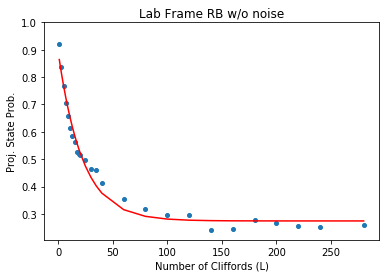

In [13]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

with open('2q_lab_RB_noisy_L.pkl', 'rb') as f:
    x = pickle.load(f)
f.close()

with open('2q_lab_RB_noisy_y.pkl', 'rb') as f:
    y = pickle.load(f)
f.close()

# with open('2q_RB_simu_yerr.pkl', 'rb') as f:
#     yerr = pickle.load(f)
# f.close()

# Fitting function
###############
# SRB

def func(x, A, B, r):
    return A * (1 - 4 / 3 * r) ** x + B

popt, pcov = curve_fit(func, x, y, p0=[1, 0, 0], bounds=(0, 1), maxfev=5000)
# p0 is the guess of the parameters. Guess B ~ 0 (ideally be 0.25) and r ~ 0 (no noise model now so r should be ultra low)
print("F_Ciff = 1 - r = ", 1 - popt[2])
print("A = ", popt[0])
print("B = ", popt[1])

###############
# SRB with fixed A and B

# def func(x, r):
#     return  0.75 * (1 - 4/3*r)**x + 0.25

# popt, pcov = curve_fit(func, x, y, p0=[0], bounds=(0, 1), maxfev=5000)
# print("F_Ciff = 1 - r = ", 1 - popt[0])

###############
# SRB with fixed B

# def func(x, A, r):
#     return  A * (1 - 4/3*r)**x + 0.25

# popt, pcov = curve_fit(func, x, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
# print("F_Ciff = 1 - r = ", 1 - popt[1])
# print("A = ", popt[0])

###############
# SRB with fixed A

# def func(x, B, r):
#     return  0.75 * (1 - 4/3*r)**x + B

# popt, pcov = curve_fit(func, x, y, p0=[0, 0], bounds=(0, 1), maxfev=5000)
# print("F_Ciff = 1 - r = ", 1 - popt[1])
# print("B = ", popt[0])

###############
# two decay parameters with fixed constant term (NUS model)

# def func(x, A, p1, B, p2):
#     return  A * p1**x + B * p2**x + 0.25

# popt, pcov = curve_fit(func, x, y, p0=[1, 1, 0, 1], bounds=((0, 0, 0, 0), (1, 1, 1, 1)), maxfev=5000)
# print("A = ", popt[0])
# print("p1 = ", popt[1])
# print("B = ", popt[2])
# print("p2 = ", popt[3])

###############
# nonexponential decay (NSW model)

# def func(x, A, r, a, B):
#     return  A * 2.718281828459045 ** (-(4/3*r*x)**a) + B

# popt, pcov = curve_fit(func, x, y, p0=[1, 0, 1, 0], sigma=yerr, bounds=((0, 0, 0, 0), (1, 1, 1, 1)), maxfev=5000)
# print("F_Ciff = 1 - r = ", 1 - popt[1])
# print("A = ", popt[0])
# print("B = ", popt[3])
# print("a = ", popt[2])

###############
# nonexponential decay with fixed constant term (NSW model)

# def func(x, A, r, a):
#     return  A * 2.718281828459045 ** (-(4/3*r*x)**a) + 0.25

# popt, pcov = curve_fit(func, x, y, p0=[1, 0, 1], bounds=((0, 0, 0), (1, 1, 1)), maxfev=5000)
# print("F_Ciff = 1 - r = ", 1 - popt[1])
# print("A = ", popt[0])
# print("a = ", popt[2])

###############

# plt.errorbar(x, y, yerr=yerr, fmt='o', markersize=4, capsize=3)
plt.plot(x, y, 'o', markersize=4)
plt.plot(x, func(x, *popt), 'r-')
# plt.plot(x, func(x, 0.0001), 'b-')
plt.ylim(top=1.0)
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
# plt.title("Two-qubit RB Fitting")
# plt.title("Gaussian Noise w/o Crosstalk Err")
plt.title("Lab Frame RB w/o noise")
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.9999999999999878, 0.902356686160067, 0.7409534149560321, 0.5544699676938837, 0.5279269575591478, 0.4957891639768349, 0.5403737807598202, 0.5052259166966008, 0.4931691253611461, 0.5112549380500658, 0.49246228792576885]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
A =  0.007455564311435008
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


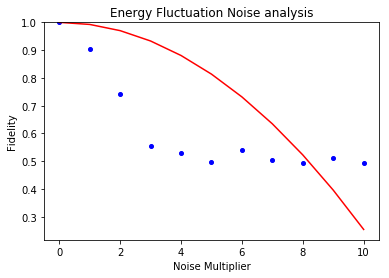

In [2]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

with open('x_1q.pkl', 'rb') as f:
    x = pickle.load(f)
f.close()

with open('y_1q.pkl', 'rb') as f:
    y = pickle.load(f)
f.close()

print(x)
print(y)
# Fitting function
def func(x, A):
    print(x)
    return 1 - A * np.array(x) * np.array(x)

# def func(x, A):
#     return  * (1 - 4/3*0.053)**x + 0.25

popt, pcov = curve_fit(func, x, y, p0=[0], maxfev=5000)
print("A = ", popt[0])

plt.plot(x, y,'bo', markersize=4)
plt.plot(x, func(x, *popt), 'r-')
plt.ylim(top=1.0)
plt.xlabel("Noise Multiplier")
plt.ylabel("Fidelity")
# plt.title("Two-qubit RB Fitting")
plt.title("Energy Fluctuation Noise analysis")
plt.show()

A =  3991.0417036935783
T2* =  9.246736511943487


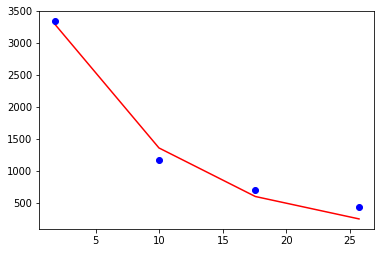

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np

x = np.array([1.772, 9.975, 17.553, 25.708])
y = np.array([3338, 1175, 700, 427])

def func(x, A, B):
    return  A * 2.718281828459045 ** (-x/B)

popt, pcov = curve_fit(func, x, y, p0=[2000, 10], maxfev=100000)
print("A = ", popt[0])
print("T2* = ", popt[1])
plt.plot(x, func(x, *popt), 'r-')
plt.plot(x, y, 'bo')